In [1]:
import tensorflow_probability as tfp
tfd = tfp.distributions
import pandas as pd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Create a Pandas DataFrame from the dataset
data = pd.DataFrame(housing.data, columns=housing.feature_names)

# Add the target variable to the DataFrame
data['target'] = housing.target

In [3]:
import sys
sys.path.append('..')
from xDL.models.NAMLSS import NAMLSS

In [4]:
namlss = NAMLSS(
    "target ~  -1 + MLP(MedInc) + MLP(AveOccup) + MLP(AveBedrms)+ MLP(Population)+  MLP(Latitude):MLP(Longitude) + MLP(AveRooms)", 
    data=data, 
    family="Normal", 
    feature_dropout=0.0001
    )


In [5]:
def KL_Divergence(y_true, y_hat):
    t = tfd.Normal(loc=y_true, scale=tf.math.reduce_std(y_true))
    p = tfd.Normal(loc=y_hat, scale=tf.math.reduce_std(y_true))  
    kl = tf.reduce_mean(tfd.kl_divergence(t, p, allow_nan_stats=True))
    return kl

namlss.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss=namlss.NegativeLogLikelihood, 
    metrics=KL_Divergence
    )

# Train the model
namlss.fit(namlss.training_dataset, epochs=100, validation_data=namlss.validation_dataset)

# Evaluate the model
loss = namlss.evaluate(namlss.validation_dataset)
print("Test Loss:", loss)

Epoch 1/100
17/17 [==============================] - 5s 45ms/step - loss: 2.7607 - KL_Divergence: 2.3305 - val_loss: 1.7668 - val_KL_Divergence: 2.4012
Epoch 2/100
17/17 [==============================] - 1s 29ms/step - loss: 1.6495 - KL_Divergence: 1.9677 - val_loss: 1.4778 - val_KL_Divergence: 1.4788
Epoch 3/100
17/17 [==============================] - 1s 27ms/step - loss: 1.3647 - KL_Divergence: 0.8890 - val_loss: 1.2128 - val_KL_Divergence: 0.6057
Epoch 4/100
17/17 [==============================] - 1s 26ms/step - loss: 1.1419 - KL_Divergence: 0.5384 - val_loss: 1.0114 - val_KL_Divergence: 0.4089
Epoch 5/100
17/17 [==============================] - 1s 31ms/step - loss: 0.9762 - KL_Divergence: 0.3759 - val_loss: 0.8918 - val_KL_Divergence: 0.3911
Epoch 6/100
17/17 [==============================] - 1s 25ms/step - loss: 0.8656 - KL_Divergence: 0.3214 - val_loss: 0.8383 - val_KL_Divergence: 0.3608
Epoch 7/100
17/17 [==============================] - 0s 24ms/step - loss: 0.8334 - KL_Di

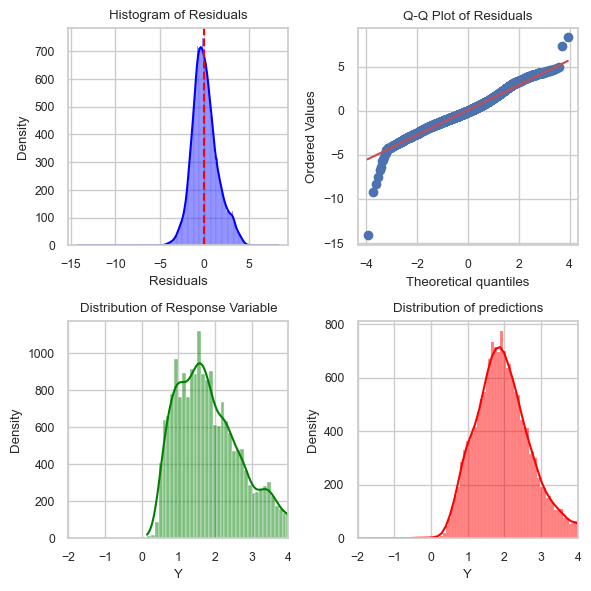

In [6]:
namlss.analytics_plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


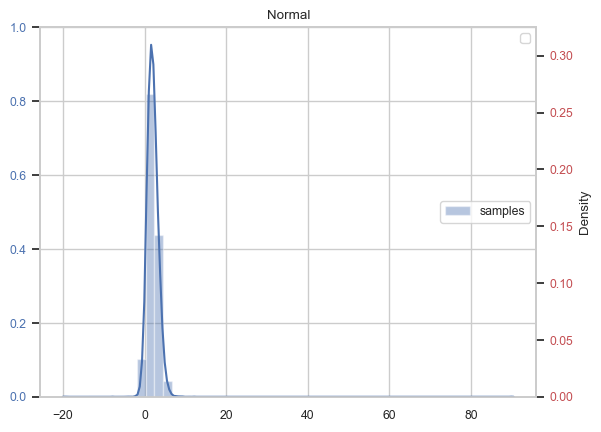

In [7]:
namlss.plot_dist()

100/100 [==============================] - 0s 1ms/step


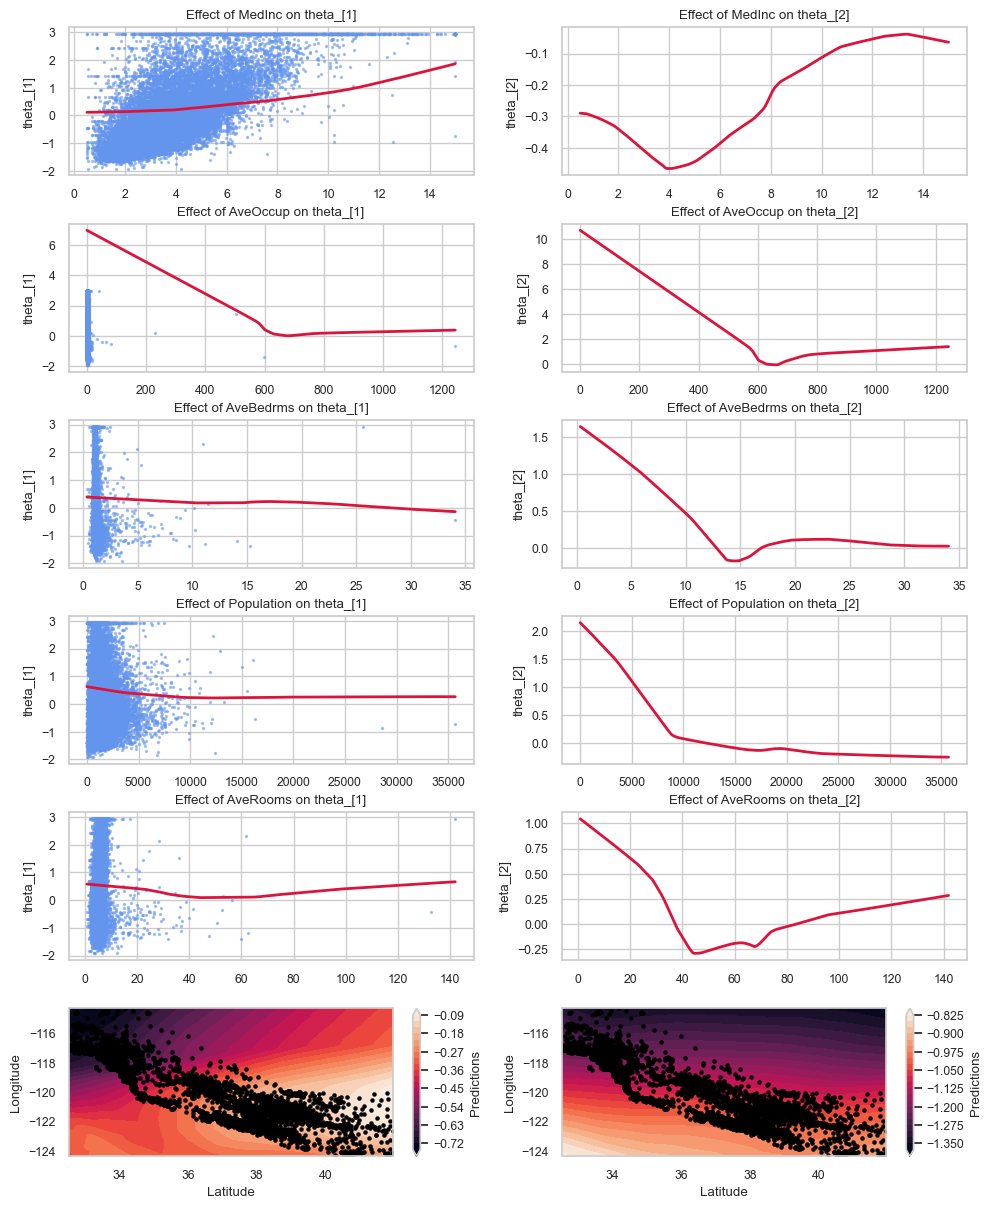

In [8]:
namlss.plot()